# Первичный анализ данных

### Для начала импортируем необходимые для анализа библиотеки и датасет:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import random
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


studying = pd.read_csv('stud_math.csv')
studying = studying[studying['score'].notnull()] # удаляем все строки, где отсутствует значение целевой переменной ('score')

## Предобработка

In [2]:
# Определим функцию, которая заменяет значения nan на None: 

def none_function(column, data=studying): 
    data[column] = data[column].astype(str).apply(lambda x: None if x.strip() =='' else x)
    return data[column]

# Для уменьшения кода выпишем функцию count_values, которая считает количество уникальных значений по отдельным столбцам: 

def count_values(column_name, data=studying): 
    return data[column_name].value_counts()

# Функция интерквартильного размаха: 
def iqr_condition(column, condition, value, data=studying):
    cond_data = data[data[condition]==value]
    IQR = cond_data[column].quantile(0.75) - cond_data[column].quantile(0.25) #Интерквартильный размах
    perc25 = cond_data[column].quantile(0.25)
    perc75 = cond_data[column].quantile(0.75)
 
    return print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

def iqr(column, data=studying):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25) #Интерквартильный размах
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
 
    return print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

### Посмотрим на данные и информацию о них: 

In [3]:
display(studying)
studying.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

### По результатам в колонке Non-Null Count видно, что количество ненулевых значений в разных столбцах отличается, а значит необходимо сначала данные очистить. 
### Также, понятно что в датасете 13 числовых и 17 строковых столбцов

### Проанализируем каждый столбец отдельно:

In [4]:
# Подсчитаем количество уникальных значений школ. По результатам их всего 2 - GP и MS. 
none_function('school')
count_values('school')

GP    344
MS     45
Name: school, dtype: int64

#### Как видим, у нас всего две школы - GP и MS, данные полные

### Посмотрим, влияет ли школа обучения на финальную оценку:

<AxesSubplot:xlabel='school', ylabel='score'>

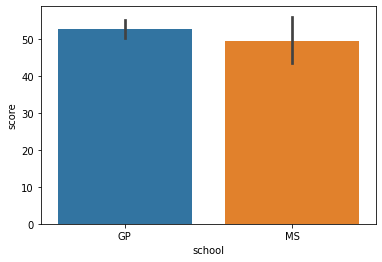

In [5]:
studying['score'] = studying['score'].astype(float)
sns.barplot(x='school', y='score', data=studying)

#### Как видим, в среднем в школе GP успеваемость лишь немного лучше, чем в школе MS. 

## Рассмотрим также влияет ли пол на успеваемость: 

In [6]:
none_function('sex')
count_values('sex')

F    204
M    185
Name: sex, dtype: int64

### Количество учащихся девочек и мальчиков почти одинаковое, но девочек немного больше. Данные полные. 

<AxesSubplot:xlabel='sex', ylabel='score'>

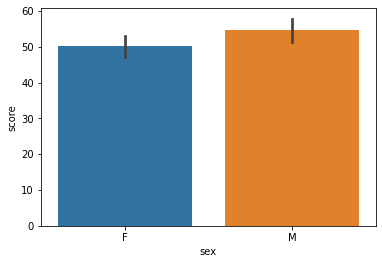

In [7]:
sns.barplot(x='sex', y='score', data=studying)

### По распределению успеваемости видим, что мальчики в среднем учатся лучше, чем девочки.

## Теперь посмотрим как влияет возраст ученика на оценку:

In [8]:
count_values('age')

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

<AxesSubplot:>

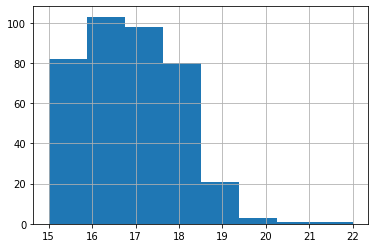

In [9]:
# Как видим по гистограмме, количество учеников старше 19 лет очень мало, что может быть связано с тем, что в таком возрасте 
# многие идут работать, а не учиться. 
studying.age.hist(bins=8)

In [10]:
#Посмотрим на выбросы: 
iqr('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


#### По результатам интерквартильного размаха понятно, что возраст 21-22 является выбросом, так как границей выбросов является возраст 21. Но в данном случае это значение можно не считать аномальным, и оставить его для анализа.

### Рассмотрим влияние возраста ученика на его оценку: 

<AxesSubplot:xlabel='age', ylabel='score'>

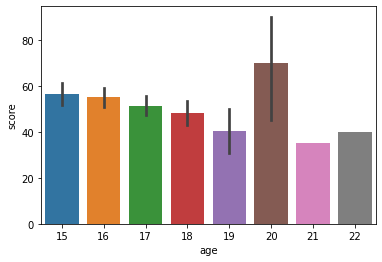

In [11]:
sns.barplot(x='age', y='score', data=studying)

### Получился достаточно интересный результат. Средняя успеваемость с возрастом снижается, но в возрасте 20 лет успеваемость аномально высокая, что может свидетельствовать об уникальности учеников, наличии выбросов или других факторах. Стоит рассмотреть значения подробнее.

In [12]:
studying[studying['age']==20].score

306    90.0
376    75.0
390    45.0
Name: score, dtype: float64

### Как видим, никаких аномалий в оценках учеников в возрасте 20 лет нету, что свидетельствует о том, что проблем с выбросами здесь нет. Рассмотрим, какие причины могут провоцировать снижение оценок учеников возраста до 20 лет: 

In [13]:
studying.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

### Как видим, в датасете присутствуют целых 37 (!!) нулевых значений целевой переменной, которые могут искажать результат успеваемости. Посмотрим на их количество по разным возрастам: 

In [14]:
studying[studying['score']==0].age.value_counts()

18    11
17     8
16     7
15     6
19     5
Name: age, dtype: int64

### Как видим, с возрастом количество нулевых оценок увеличивается, возможно, по причине увеличения пропусков. 

# Рассмотрим распределение пропусков по возрасту:

<AxesSubplot:xlabel='age', ylabel='absences'>

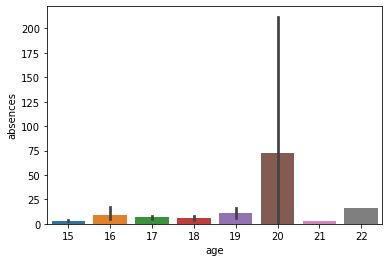

In [15]:
sns.barplot(x='age', y='absences', data=studying)

### Весьма удивительно, но именно у учеников 20 лет, у которых самая высокая успеваемость, в среднем самое высокое количество пропусков. Это дает право подозревать, что в пропусках есть выбросы, рассмотрим их более подробно.

<AxesSubplot:xlabel='age', ylabel='absences'>

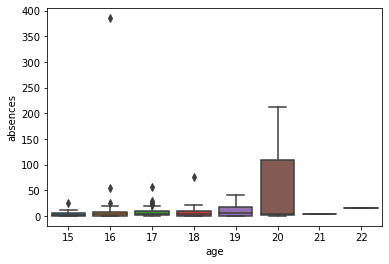

In [16]:
sns.boxplot(x='age', y='absences', data=studying)

### Учитывая, что учеников возраста 20 лет всего трое, выбросов в их значении как раз нету, потому что статистически их неоткуда брать. Тем не менее, такое высокое значение пропусков является скорее исключением из правил, чем правилом, поэтому я думаю, что для дальнейшего анализа это значение лучше все-таки преобразовать либо исключить из датасета. 

In [17]:
# Посмотрим на значения показателей для учеников 20 лет, в особенности интересуют колонки 'absences' и 'score'
studying[studying['age']==20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


### У ученика с 212 пропусками оценка составляет 45 баллов. Допустим, что произошла опечатка, и на самом деле количество пропусков не 212, а 21, и заменим значение: 

In [18]:
studying['absences']=studying['absences'].replace(212.0, 21.0)

<AxesSubplot:xlabel='age', ylabel='absences'>

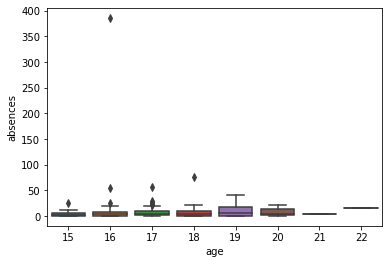

In [19]:
sns.boxplot(x='age', y='absences', data=studying)

### Как видим, ситуация улучшилась. Поскольку мы уже видим выбросы в количестве пропусков для других возрастов, рассмотрим их тоже: 

In [20]:
studying[studying['absences']>50]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


### Наиболее аномальное значение пропусков во всем датасете - 385. Звучит весьма нереалистично, особенно учитывая тот факт, что это число больше, чем количество дней в году. Учитывая, что у этого ученика высокий балл (85), допустим, что количество пропусков у него равно верхней границе интерквартильного размаха, и заменим это значение.

In [21]:
# Ищем границы выбросов интерквартильного размаха для возраста 16 лет:
iqr_condition('absences', 'age', 16)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


### Верхняя граница выбросов равна 20, поэтому заменим значение 385 на 20: 

In [22]:
studying['absences']=studying['absences'].replace(385.0, 20.0)
studying[studying['absences']>50]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


<AxesSubplot:xlabel='age', ylabel='absences'>

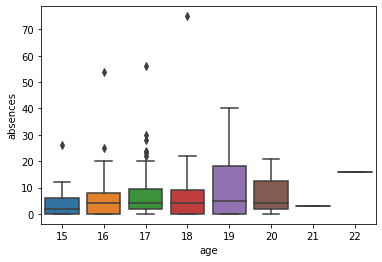

In [23]:
sns.boxplot(x='age', y='absences', data=studying)

### Посмотрим на значения пропусков безотносительно каких-либо факторов: 

<AxesSubplot:xlabel='absences'>

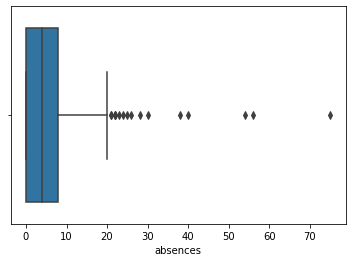

In [24]:
sns.boxplot(x='absences', data=studying)

### Как видим, верхняя граница выбросов составляет 20 пропусков, но пока оставим эти данные как есть, возможно они будут полезны в целом для анализа, вернемся к этому вопросу позже

## Двигаемся дальше. Рассмотрим как адрес (местность проживания) влияет на успеваемость: 

In [25]:
none_function('address')
count_values('address') 

U      291
R       83
nan     15
Name: address, dtype: int64

#### Как видим, присутствуют значения, которые мы не сможем пока заполнить. Большинство учащихся живут в городе, значит можно допустить, что данное значение можно будет вычислить по количеству времени, которое ученики тратят на дорогу 

## Посмотрим на распределение: 

<AxesSubplot:xlabel='address', ylabel='score'>

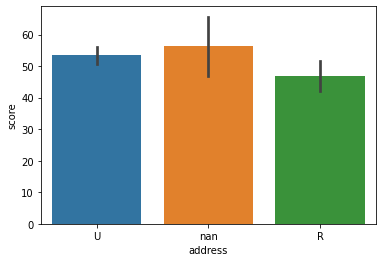

In [26]:
sns.barplot(x='address', y='score', data=studying)

### Как видим, успеваемость учеников из городской местности немного выше, чем учеников сельской местности, но стоит понимать, что по 15 ученикам информация отсутствует. 

### Попробуем посмотреть на распределение количества времени, которое учащиеся тратят на дорогу, возможно это даст нам понять каким образом можно заполнить пропуски по адресам. 

In [27]:
none_function('traveltime')
count_values('traveltime')

1.0    239
2.0     94
nan     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

<AxesSubplot:xlabel='traveltime', ylabel='score'>

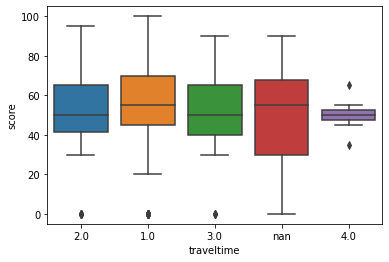

In [28]:
sns.boxplot(x='traveltime', y='score', data=studying)

## На первый взгляд, коробки с усами для расстояния 1,2, 3 выглядят похоже. Выделяется распределение для признака с отсутствующими значениями и распределение для расстояния 4. 
## Посмотрим на график зависимости успеваемости от времени, которое ученики тратят на дорогу

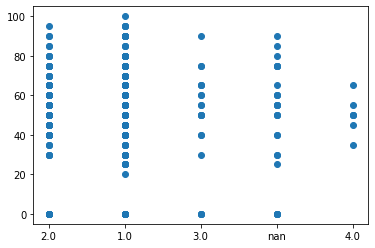

In [29]:
plt.scatter('traveltime', 'score', data=studying)

## Нетрудно заметить, что наиболее информативным показателем является показатель расстояния, равный 4, поскольку значений в нем мало, и их разброс не очень большой. Можно вынести этот показатель как отдельный признак, но возможно, что nan-значения относятся именно к нему. В таком случае этот показатель тоже нельзя будет считать информативным. 
## Проверим, нельзя ли заполнить пропуски при помощи информации по адресам: 

In [30]:
studying[studying['traveltime']=='1.0'].address.value_counts()

U      198
R       34
nan      7
Name: address, dtype: int64

### Большинство значений для расстояния 1 - Urban, поэтому значения nan в поле адрес для этого расстояния мы заменим на 'U': 

In [31]:
studying.loc[(studying['address']=='nan') & (studying['traveltime']=='1.0'), 'address']='U'
studying[studying['traveltime']=='1.0'].address.value_counts() #Проверка

U    205
R     34
Name: address, dtype: int64

In [32]:
# Делаем то же самое для расстояния 2.0
studying[studying['traveltime']=='2.0'].address.value_counts()

U      63
R      26
nan     5
Name: address, dtype: int64

### Большинство значений для расстояния 2 - Urban, поэтому значения nan в поле адрес для этого расстояния мы тоже заменим на 'U': 

In [33]:
studying.loc[(studying['address']=='nan') & (studying['traveltime']=='2.0'), 'address']='U'
studying[studying['traveltime']=='2.0'].address.value_counts() #Проверка

U    68
R    26
Name: address, dtype: int64

##  Делаем то же самое для адресов с расстоянием 3 и 4. Как видно ниже, пустых значений для них нету

In [34]:
studying[studying['traveltime']=='3.0'].address.value_counts()

R    12
U     9
Name: address, dtype: int64

In [35]:
studying[studying['traveltime']=='4.0'].address.value_counts()

R    4
U    3
Name: address, dtype: int64

## Проверим адреса для расстояний, которые не указаны (nan-значения). Видим ниже, что большинство - это городские адреса, поэтому заменим nan-значения городских адресов на 'U' (их всего 3): 

In [36]:
studying[studying['traveltime']=='nan'].address.value_counts()

U      18
R       7
nan     3
Name: address, dtype: int64

In [37]:
studying.loc[(studying['address']=='nan') & (studying['traveltime']=='nan'), 'address']='U'
studying[studying['traveltime']=='nan'].address.value_counts() # Проверка


U    21
R     7
Name: address, dtype: int64

## Посмотрим снова на распределение оценок в зависимости от места проживания: 


<AxesSubplot:xlabel='address', ylabel='score'>

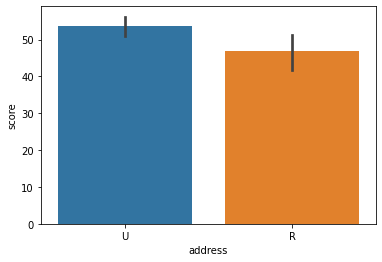

In [38]:
sns.barplot(x='address', y='score', data=studying)

###  Как видим, ситуация почти не изменилась, но оставим эту переменную для дальнейшего анализа

## Попробуем заполнить пропуски переменной traveltime: 

In [39]:
studying[studying['traveltime']=='nan'].address.value_counts()

U    21
R     7
Name: address, dtype: int64

### По предыдущему анализу можно сделать выводы, что большинство адресов Urban имеют расстояние 1 или 2, в то время как большинство адресов Rural имеют расстояния 3 или 4. Поэтому все nan-расстояния с адресом Urban мы заменим на значение 1.0, а все nan-расстояния со значением местности Rural мы заменим на значения 4.0. 

In [40]:
studying.loc[(studying['address']=='U') & (studying['traveltime']=='nan'), 'traveltime']='1.0'
studying.loc[(studying['address']=='R') & (studying['traveltime']=='nan'), 'traveltime']='4.0'

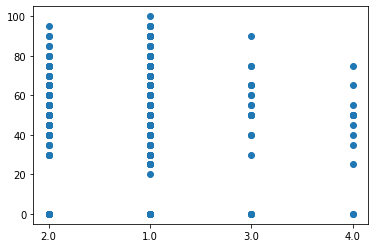

In [41]:
plt.scatter('traveltime', 'score', data=studying)

<AxesSubplot:xlabel='traveltime', ylabel='score'>

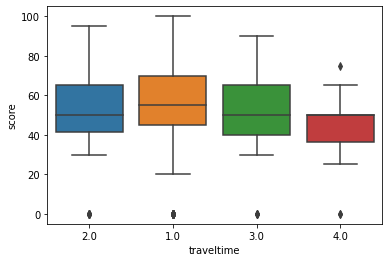

In [42]:
sns.boxplot(x='traveltime', y='score', data=studying)

## По графиках выше видно, что после "восстановления" отсутствующих значений признаки стали более информативными. Например, сейчас явно можно заметить спадную тенденцию в значениях оценок при увеличении расстояния, которое ученики тратят на дорогу - при условии, что им нужно дольше добираться до школы, их медианные оценки ухудшаются. Поэтому признак traveltime оставим для дальнейшего анализа и включения его в модель


### Далее рассмотрим состав семьи учеников (GT3 - больше 3 человек, LE3 - меньше 3 человек): 

In [43]:
none_function('famsize')
count_values('famsize')

GT3    255
LE3    107
nan     27
Name: famsize, dtype: int64

#### В результате видим, что 27 значений в колонке размера семьи являются пустыми. На данный момент заполнить пропуски не представляется возможным. Количество неполных семей в два раза меньше, чем полных. 

### Теперь рассмотрим, вместе ли живут родители учеников (T - вместе, А - раздельно): 

In [44]:
none_function('Pstatus')
count_values('Pstatus')

T      308
nan     45
A       36
Name: Pstatus, dtype: int64

#### Как видим, количество пропущенных значений для данного показателя больше, чем для показателя 'famsize', но можно попробовать заполнить некоторые пропуски. 

## Для заполнения пропусков в предыдущих переменных могут быть полезными переменные Mjob, Fjob, guardian. Рассмотрим каждую из них: 

In [45]:
none_function('Mjob')
count_values('Mjob')

other       127
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

In [46]:
none_function('Fjob')
count_values('Fjob')

other       194
services     99
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [47]:
none_function('guardian')
count_values('guardian')

mother    248
father     86
nan        31
other      24
Name: guardian, dtype: int64

## В каждой из перечисленных переменных присутствуют от 19 до 36 nan-значений. Попробуем заполнить пропуски

In [48]:
studying[(studying['famsize']=='LE3') & (studying['Pstatus']=='T')].Mjob.value_counts()

other       25
services    22
teacher     13
at_home     12
health       8
nan          1
Name: Mjob, dtype: int64

In [49]:
studying[(studying['famsize']=='GT3') & (studying['Pstatus']=='A')].Fjob.value_counts()

other       10
services     4
teacher      2
nan          2
at_home      1
health       1
Name: Fjob, dtype: int64

## В семьях, где родители живут и вместе, и отдельно в большинстве случаев опекуном является мама, независимо от того, где она работает. Поэтому пропуски в столбце guardian просто заменим на mother (я пробовала много вариантов, но ничего особенного не нашла, по всем из них пропуски можно заполнить mother)

In [50]:
studying.loc[studying['guardian']=='nan', 'guardian']='mother'
studying.guardian.value_counts() # Проверка

mother    279
father     86
other      24
Name: guardian, dtype: int64

## Также, были рассмотрены разные комбинации переменных famsize, Pstatus, Fjob, Mjob. Для каждого варианта большинство значений для Mjob и Fjob - other, как и для общего случая (без учета других факторов). Поэтому nan-значения для переменных Fjob и Mjob будут заменены на other (в принципе, other мы тоже не особо можем интерпретировать)


In [51]:
studying.loc[studying['Mjob']=='nan', 'Mjob']='other' # Заменяем nan-значения в Mjob на other
studying.loc[studying['Fjob']=='nan', 'Fjob']='other' # Заменяем nan-значения в Fjob на other

## Теперь поработаем над пропусками в Famsize и Pstatus: 

In [52]:
studying[studying['famsize']=='LE3'].Pstatus.value_counts()

T      81
A      13
nan    13
Name: Pstatus, dtype: int64

In [53]:
studying[studying['famsize']=='GT3'].Pstatus.value_counts()

T      207
nan     28
A       20
Name: Pstatus, dtype: int64

## Как видим, независимо от размера семьи, в большинстве случаев Pstatus равен Т, поэтому заменим отсутствующие значения в Pstatus на Т 

In [54]:
studying.loc[studying['Pstatus']=='nan', 'Pstatus']='T'
count_values('Pstatus') # Проверка

T    353
A     36
Name: Pstatus, dtype: int64

## То же самое касается и famsize: независимо от того, вместе или раздельно живут родители, в большинстве случаев размер семьи составляет больше трех человек. Таким образом, заменим nan-значения в столбце famsize на GT3

In [55]:
studying[studying['Pstatus']=='A'].famsize.value_counts()

GT3    20
LE3    13
nan     3
Name: famsize, dtype: int64

In [56]:
studying[studying['Pstatus']=='T'].famsize.value_counts()

GT3    235
LE3     94
nan     24
Name: famsize, dtype: int64

In [57]:
studying.loc[studying['famsize']=='nan', 'famsize']='GT3'
count_values('famsize') # Проверка

GT3    282
LE3    107
Name: famsize, dtype: int64

## Теперь рассмотрим переменные Medu и Fedu: 
        

In [58]:
none_function('Medu')
count_values('Medu')

4.0    131
2.0    100
3.0     96
1.0     56
nan      3
0.0      3
Name: Medu, dtype: int64

In [59]:
studying[studying['Medu']=='nan'].Mjob # Проверяем тип работы мамы при условии nan-значения Medu

92        other
193    services
239       other
Name: Mjob, dtype: object

In [60]:
studying[(studying['Mjob']=='other') | (studying['Mjob']=='services')].Medu.value_counts() 
# Для работы other или services наиболее частое значение Medu - 3.0

3.0    80
2.0    77
4.0    53
1.0    30
nan     3
0.0     1
Name: Medu, dtype: int64

In [61]:
# Заменим nan-значения Medu на 3.0: 
studying.loc[(studying['Medu']=='nan'), 'Medu']='3.0'
count_values('Medu') # Проверка

4.0    131
2.0    100
3.0     99
1.0     56
0.0      3
Name: Medu, dtype: int64

In [62]:
none_function('Fedu')
count_values('Fedu')

2.0     105
3.0      94
4.0      88
1.0      75
nan      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [63]:
studying[studying['Fedu']=='nan'].Fjob.value_counts()

other       9
services    8
teacher     3
at_home     2
health      2
Name: Fjob, dtype: int64

### Наиболее часто встречаются два значения типа работы отца при условии, что отсутствуют данные о его образовании - это other и services (как и в случае с мамами). Поэтому заменим nan-значения об уровне обучения, базируясь на этих данных: 

In [64]:
studying[(studying['Fjob']=='other') | (studying['Fjob']=='services')].Fedu.value_counts() 

2.0     98
3.0     87
1.0     71
4.0     53
nan     17
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [65]:
studying.loc[studying['Fedu']=='nan', 'Fedu']='2.0'
count_values('Fedu') # Проверка

2.0     129
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

### Также стоит отметить, что в данных Fedu есть явная опечатка (значение 40), заменим его на 4: 

In [66]:
studying.loc[studying['Fedu']=='40.0', 'Fedu']='4.0'
count_values('Fedu') # Проверка

2.0    129
3.0     94
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64

### Рассмотрим переменную reason, которая объясняет причины выбора конкретной школы

In [67]:
none_function('reason')
count_values('reason')

course        135
reputation    102
home          101
other          34
nan            17
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='score'>

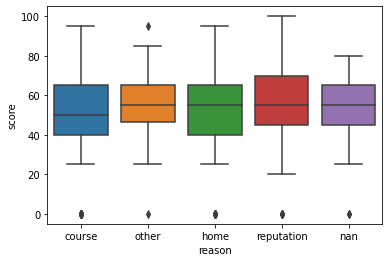

In [68]:
sns.boxplot(x='reason', y='score', data=studying)

## Судя по построенной диаграмме с усами, нельзя сказать что какой-либо из этих признаков является информативным, поскольку медианные значения по всем признакам, кроме course - одинаковы, и сами коробки с усами похожи друг на друга. Попробуем посмотреть на отсутствующие значения. 

### При условии, что главным приоритетом при выборе школы является наполнение программы, стоит посмотреть, хотят ли ученики платить за дополнительные занятия: 

In [69]:
studying[studying['reason']=='course'].paid.value_counts()

no     81
yes    44
Name: paid, dtype: int64

### Как видим, нет. Попробуем заполнить пропуски с учетом этой информации: 

In [70]:
studying[studying['paid']=='no'].reason.value_counts() 

course        81
reputation    46
home          44
other         14
nan           12
Name: reason, dtype: int64

In [71]:
studying.loc[(studying['paid']=='no') & (studying['reason']=='nan'), 'reason']='course'
studying.reason.value_counts()

course        147
reputation    102
home          101
other          34
nan             5
Name: reason, dtype: int64

### Теперь посмотрим, какие категории учеников готовы заплатить за дополнительное обучение: 

In [72]:
studying[studying['paid']=='yes'].reason.value_counts()

home          49
course        44
reputation    44
other         12
nan            4
Name: reason, dtype: int64

### Как видим, распределение почти равномерно между группами home, course и reputation, но именно для категории home количество студентов, готовых заплатить за дополнительные уроки является большим, чем тех, кто не готов. Заполним соответственно пропуски: 

In [73]:
studying[studying['reason']=='home'].paid.value_counts()

yes    49
no     44
Name: paid, dtype: int64

In [74]:
studying[studying['reason']=='reputation'].paid.value_counts()

no     46
yes    44
Name: paid, dtype: int64

In [75]:
studying.loc[(studying['traveltime']=='1.0') & (studying['reason']=='nan'), 'reason']='home'
count_values('reason')

course        147
home          106
reputation    102
other          34
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='score'>

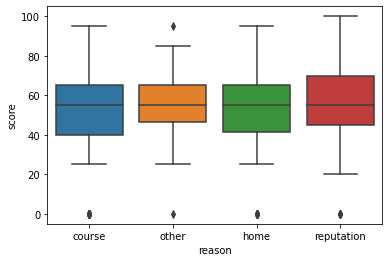

In [76]:
sns.boxplot(x='reason', y='score', data=studying)

### Теперь с уверенностью можно сказать, что данный признак не является информативным, поэтому его можно не брать во внимание для последующего анализа. Все коробки с усами очень похожи, поэтому мы не будем рассматривать показатель причины выбора школы

## Рассмотрим фактор Studytime - уж он точно должен влиять на успеваемость по математике!

In [77]:
none_function('studytime')
count_values('studytime')

2.0    189
1.0    103
3.0     63
4.0     27
nan      7
Name: studytime, dtype: int64

In [78]:
# Пропущенных значений 7, заменим их на наиболее часто встречающееся: 
studying.loc[studying['studytime']=='nan', 'studytime']='2.0'

### Посмотрим как количество времени, посвященного учебе влияет на успеваемость: 

<AxesSubplot:xlabel='studytime', ylabel='score'>

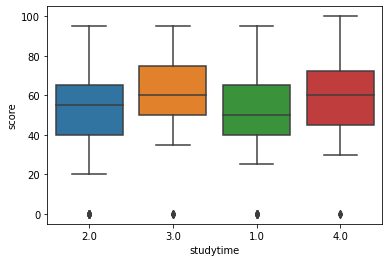

In [79]:
sns.boxplot(x='studytime', y='score', data=studying)

## Как видим, количество времени, которое ученики посвящают учебе, имеет влияние на успеваемость, при чем наиболее заметна разница у тех, кто посвящает в среднем 5-10 часов на обучение в неделю. Стоит отметить, что для категорий 1 и 2 существенных отличий в успеваемости нет, то есть успеваемость заметно увеличивается, если количество времени, потраченного на обучение, увеличивается хотя бы до 5 часов в неделю

## Рассмотрим зависимость оценок от количества внеучебных неудач

In [80]:
none_function('failures')
count_values('failures')

0.0    290
1.0     48
nan     22
2.0     15
3.0     14
Name: failures, dtype: int64

### Сразу заменим отсутствующие значения на медианный признак: 

In [81]:
studying['failures'].median()

0.0

In [82]:
studying.loc[studying['failures']=='nan', 'failures']=0.0

### Посмотрим, влияют ли внеучебные неудачи на успеваемость: 

<AxesSubplot:xlabel='failures', ylabel='score'>

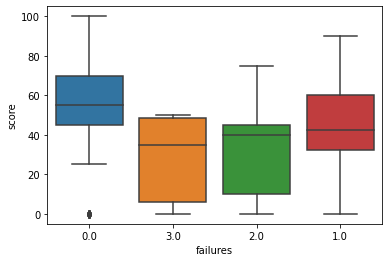

In [83]:
none_function('failures')
sns.boxplot(x='failures', y='score', data=studying)

### Как видим, этот признак является значимым, при увеличении количества неудач возрастает вероятность получения худшей оценки. 

## Теперь посмотрим на влияние фактора дополнительной школьной поддержки: 

In [84]:
none_function('schoolsup')
count_values('schoolsup')

no     331
yes     49
nan      9
Name: schoolsup, dtype: int64

### Сразу заменим nan-значения на 'no' - значение моды 

In [85]:
studying.loc[studying['schoolsup']=='nan', 'schoolsup']='no'
count_values('schoolsup')

no     340
yes     49
Name: schoolsup, dtype: int64

<AxesSubplot:xlabel='schoolsup', ylabel='score'>

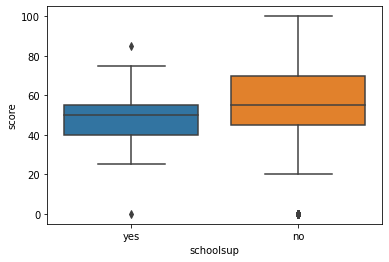

In [86]:
## Глянем на boxplot
sns.boxplot(x='schoolsup', y='score', data=studying)

### Как видим, признак дополнительной поддержки в школе является значимым. Проверим насколько влияет поддержка семьи на успеваемость: 

In [87]:
none_function('famsup')
count_values('famsup')

yes    216
no     135
nan     38
Name: famsup, dtype: int64

### Поскольку количество отсутствующих значений по этому признаку составляет достаточно большую часть от обеих категорий, которые в нем присутствуют, попробуем найти зависимость между его значением и значением признака famrel (семейные отношения): 

In [88]:
studying[studying['famsup']=='yes'].famrel.value_counts() 

 4.0    104
 5.0     49
 3.0     31
 2.0      9
 1.0      4
-1.0      1
Name: famrel, dtype: int64

In [89]:
studying[studying['famsup']=='no'].famrel.value_counts()

4.0    55
5.0    38
3.0    26
2.0     6
1.0     3
Name: famrel, dtype: int64

In [90]:
studying[studying['famsup']=='nan'].famrel.value_counts()

4.0    19
5.0    10
3.0     5
2.0     2
Name: famrel, dtype: int64

### По всем значениям famsup (yes, no, nan) - наиболее часто отношения в семье оцениваются как 4. Посмотрим еще как отношения влияют непосредственно на оценки: 

<AxesSubplot:xlabel='famsup', ylabel='score'>

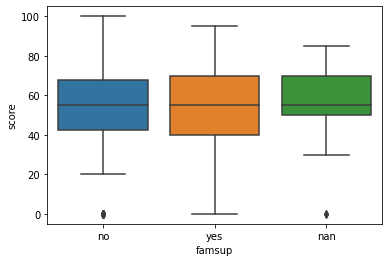

In [91]:
sns.boxplot(x='famsup', y='score', data=studying)

### По диаграмме коробок с усами видим, что этот признак вряд ли является значимым для анализа. Попробуем заменить отсутствующие значения на моду (yes):

<AxesSubplot:xlabel='famsup', ylabel='score'>

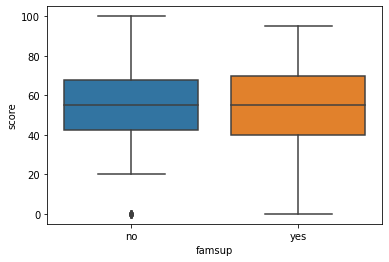

In [92]:
studying.loc[studying['famsup']=='nan', 'famsup']='yes'
sns.boxplot(x='famsup', y='score', data=studying)

### Результаты показывают, что наличие поддержки особо не влияет на успеваемость - медианное значение одинаковое у обоих значений, а интерквартильный размах при наличии поддержки даже выше, при этом максимальная оценка немного ниже. 

## Поскольку мы уже рассмотрели фактор famrel, уберем в нем сразу отсутствующие значения (заменим на моду - 4.0) и посмотрим на его влияние на успеваемость:

In [103]:
none_function('famrel')
count_values('famrel')
studying.loc[studying['famrel']=='nan', 'famrel']='4.0'
studying.loc[studying['famrel'].astype(float)==-1.0, 'famrel']='1.0' # Опечатка в значениях

In [279]:
studying.famrel.value_counts()
studying.famrel = studying.famrel.astype(float)

<AxesSubplot:xlabel='famrel', ylabel='score'>

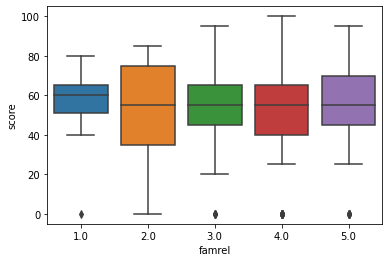

In [280]:
sns.boxplot(x='famrel', y='score', data=studying)

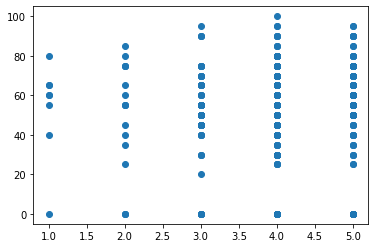

In [281]:
plt.scatter('famrel', 'score', data=studying)

### Как видим, хорошие семейные отношения (уровень 3-5) особо не влияют на успеваемость, зато можно отметить, что успеваемость студентов, у которых проблемы в семье (отношения 1-2) успеваемость по математике в целом ниже, что проявляется в отсутствии максимальных оценок.

## Теперь посмотрим насколько дополнительные занятия по математике повлияли на успеваемость: 

In [107]:
none_function('paid')
count_values('paid')

no     197
yes    153
nan     39
Name: paid, dtype: int64

<AxesSubplot:xlabel='paid', ylabel='score'>

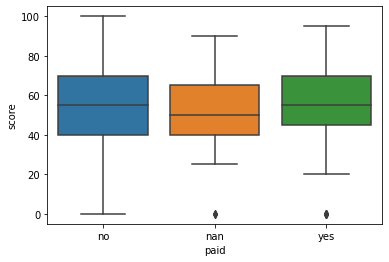

In [108]:
sns.boxplot(x='paid', y='score', data=studying)

### Глядя на коробки с усами, можно сделать выводы, что распределение отсутствующих значений больше похоже на распределение оценок учеников, которые платили за дополнительные занятия, хотя медиана в отсутствующих значениях смещена вниз. Заменим nan на yes:

In [109]:
studying.loc[studying['paid']=='nan', 'paid']='yes'
studying.paid.value_counts()

no     197
yes    192
Name: paid, dtype: int64

<AxesSubplot:xlabel='paid', ylabel='score'>

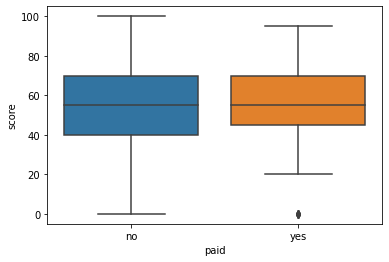

In [110]:
sns.boxplot(x='paid', y='score', data=studying)

### Посмотрим, влияют ли на успеваемость внеучебные занятия: 

In [111]:
none_function('activities')
count_values('activities')

yes    192
no     183
nan     14
Name: activities, dtype: int64

<AxesSubplot:xlabel='activities', ylabel='score'>

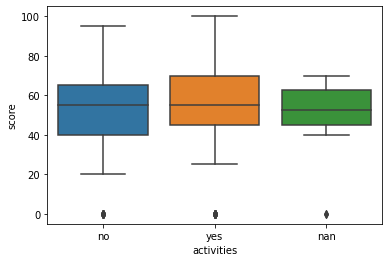

In [112]:
sns.boxplot(x='activities', y='score', data=studying)

### Как видим, медиана оценок для nan-значений больше подходит для распределения оценок для значений 'no', поэтому такую замену и сделаем: 

In [113]:
studying.loc[studying['activities']=='nan', 'activities']='no'

<AxesSubplot:xlabel='activities', ylabel='score'>

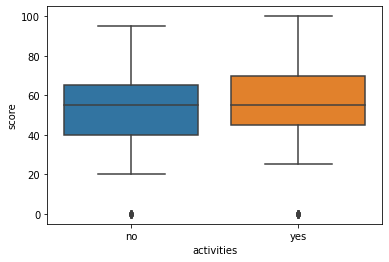

In [114]:
sns.boxplot(x='activities', y='score', data=studying)

### Как видим, медианные значения у этих переменных одинаковы, но дополнительные учебные занятия все-таки немного влияют на успеваемость

## Посмотрим, каким образом на успеваемость по математике влияет посещение детского сада: 

In [115]:
none_function('nursery')
count_values('nursery')

yes    297
no      77
nan     15
Name: nursery, dtype: int64

### Здесь все просто: значения nan заменяем на моду: 

In [116]:
studying.loc[studying['nursery']=='nan', 'nursery']='yes'

<AxesSubplot:xlabel='nursery', ylabel='score'>

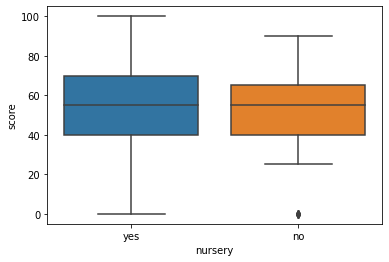

In [117]:
sns.boxplot(x='nursery', y='score', data=studying)

### Вряд ли этот признак является информативным, но пока не будем исключать его из анализа

## Рассмотрим показатель, который не был указан в изначальных инструкциях - studytime, granular. 

In [118]:
none_function('studytime, granular')
count_values('studytime, granular')

-6.0     189
-3.0     103
-9.0      63
-12.0     27
nan        7
Name: studytime, granular, dtype: int64

<AxesSubplot:xlabel='studytime, granular', ylabel='score'>

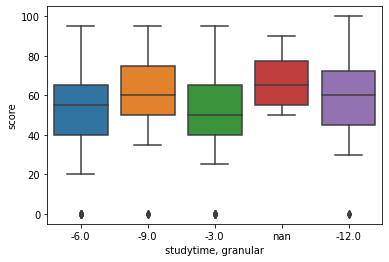

In [119]:
sns.boxplot(x='studytime, granular', y='score', data=studying)

### Заменим nan-значения на медианное: 

In [120]:
studying['studytime, granular'].median()

-6.0

In [121]:
studying.loc[studying['studytime, granular']=='nan', 'studytime, granular']=-6

<AxesSubplot:xlabel='studytime, granular', ylabel='score'>

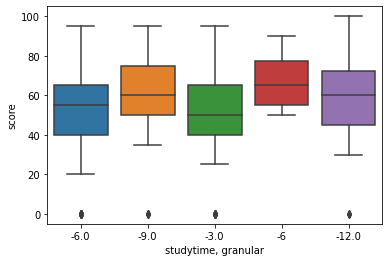

In [122]:
sns.boxplot(x='studytime, granular', y='score', data=studying)

## Сложно говорить о том, что означает этот признак, но можно сделать выводы о его значимости. Явно выделяющегося признака нету, разве что значение -9. Пока оставим этот показатель 

### Рассмотрим, влияет ли на успеваемость учеников желание поступить в университет: 

In [123]:
none_function('higher')
count_values('higher')

yes    350
nan     20
no      19
Name: higher, dtype: int64

## Тут все просто, nan-значения заменяем на моду: 

In [124]:
studying.loc[studying['higher']=='nan', 'higher']='yes'

<AxesSubplot:xlabel='higher', ylabel='score'>

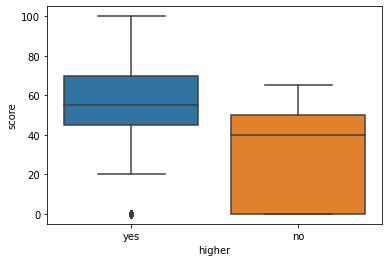

In [125]:
sns.boxplot(x='higher', y='score', data=studying)

## Ожидаемый и очень явный результат: желание поступить в университет явно влияет на оценки по математике в сторону повышения

### Посмотрим как влияет на оценку наличие интернета в доме: 

In [126]:
none_function('internet')
count_values('internet')

yes    300
no      55
nan     34
Name: internet, dtype: int64

### Заменим отсутствующие значения на моду: 

In [127]:
studying.loc[studying['internet']=='nan', 'internet']='yes'

<AxesSubplot:xlabel='internet', ylabel='score'>

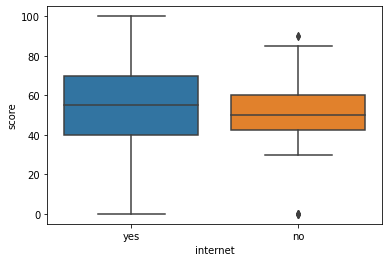

In [128]:
sns.boxplot(x='internet', y='score', data=studying)

### Видим что здесь тоже присутствует явная зависимость

## Посмотрим как на успеваемость учеников влияет наличие у них романтических отношений: 

In [129]:
none_function('romantic')
count_values('romantic')

no     235
yes    123
nan     31
Name: romantic, dtype: int64

In [130]:
# Недостающие значения меняем на моду: 
studying.loc[studying['romantic']=='nan', 'romantic']='no'

<AxesSubplot:xlabel='romantic', ylabel='score'>

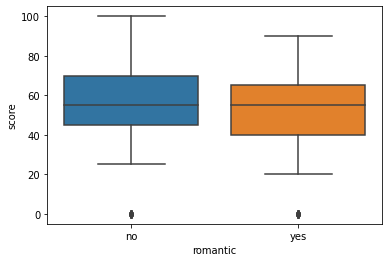

In [131]:
sns.boxplot(x='romantic', y='score', data=studying)

### Ну тут можно сказать, что успеваемость немного выше у тех, у кого романтических отношений нету

## Посмотрим как на успеваемость влияет наличие свободного времени после школы

In [132]:
none_function('freetime')
count_values('freetime')

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
nan      9
Name: freetime, dtype: int64

In [139]:
# nan-значения заменим на медианные: 
studying['freetime'].median()

3.0

In [277]:
studying.loc[studying['freetime']=='nan', 'freetime']=3.0
studying.freetime.value_counts()
studying.freetime=studying.freetime.astype(float)

<AxesSubplot:xlabel='freetime', ylabel='score'>

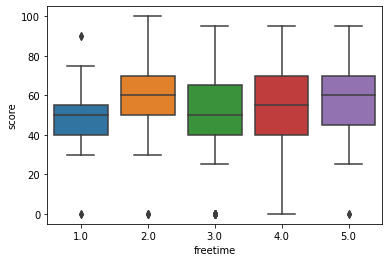

In [278]:
sns.boxplot(x='freetime', y='score', data=studying)

### Стоит отметить, что особо выделяется категория учеников, у которых  мало свободного времени - успеваемость у них явно ниже, чем у остальных. Категории 3-5 очень похожи, категория учеников, у которых всего 2 часа свободного времени справляется немного лучше остальных, что видно по уровню медианы, а также границ выбросов

## Посмотрим как на успеваемость влияет проведение времени с друзьями: 

In [272]:
none_function('goout')
studying.goout.value_counts()

[23, 51, 81, 101, 133]

In [275]:
# Заменим nan-значения на моду:
studying.loc[studying['goout']=='nan', 'goout']=3.0
studying.goout = studying.goout.astype(float)

<AxesSubplot:xlabel='goout', ylabel='score'>

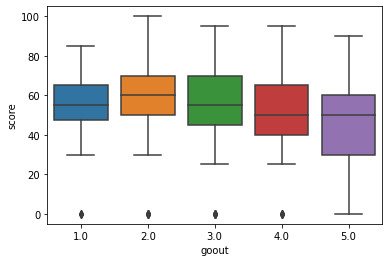

In [276]:
sns.boxplot(x='goout', y='score', data=studying) 

### Интересный результат. Если ученик проводит с друзьями слишком мало времени (значение 1), это сказывается на его обучении, баллы по математике ниже, чем если он проводит с друзьями чуть больше времени (значение 2). Но если количество времени, которое ученик проводит с друзьями слишком велико, то его баллы снижаются. Делу время - потехе час :) 

## Посмотрим так же как на результат влияет состояние здоровья: 

In [154]:
none_function('health')
count_values('health')

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
nan     15
Name: health, dtype: int64

In [155]:
# Заменим отсутствующие значения на моду: 
studying.loc[studying['health']=='nan', 'health']=5.0

In [270]:
sorted(studying['health'])

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0

<AxesSubplot:xlabel='health', ylabel='score'>

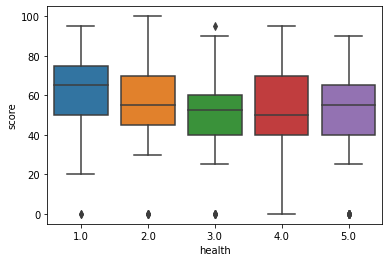

In [271]:
sns.boxplot(x='health', y='score', data=studying)

### Видим спадную зависимость: чем хуже здоровье, тем лучше баллы по математике.

## Ну и уберем пропуски в значении absences, используя медианное значение:

In [158]:
none_function('absences')
studying.absences.median()

4.0

In [159]:
studying.loc[studying['absences']=='nan', 'absences']=4.0

# Мы исследовали все переменные, убрали пропуски. Посмотрим снова на наш датасет:

In [160]:
studying.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   Pstatus              389 non-null    object 
 6   Medu                 389 non-null    object 
 7   Fedu                 389 non-null    object 
 8   Mjob                 389 non-null    object 
 9   Fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           389 non-null    object 
 13  studytime            389 non-null    object 
 14  failures             389 non-null    object 
 15  schoolsup            389 non-null    obj

### Вернем числовой формат нужным колонкам: 

In [161]:
studying['Medu'] = studying['Medu'].astype(float)
studying['Fedu'] = studying['Fedu'].astype(float)
studying['traveltime'] = studying['traveltime'].astype(float)
studying['studytime'] = studying['studytime'].astype(float)
studying['failures'] = studying['failures'].astype(float)
studying['studytime, granular'] = studying['studytime, granular'].astype(float)
studying['famrel'] = studying['famrel'].astype(float)
studying['freetime'] = studying['freetime'].astype(float)
studying['goout'] = studying['goout'].astype(float)
studying['health'] = studying['health'].astype(float)
studying['absences'] = studying['absences'].astype(float)

## Теперь устраним выбросы для числовых переменных: 

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


<AxesSubplot:xlabel='age'>

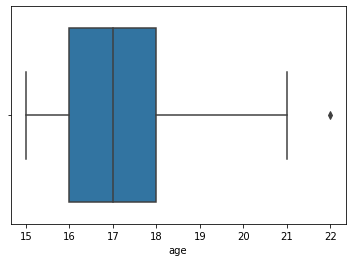

In [162]:
iqr('age')
sns.boxplot(x=studying['age']) # ранее было решено возраст в 22 года выбромо не считать) 

## В переменных Medu, Fedu, traveltime, studytime, failures, studytime, granular, famrel, freetime, goout, health выбросов нету

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


<AxesSubplot:xlabel='absences'>

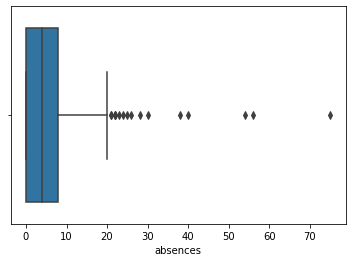

In [163]:
iqr('absences')
sns.boxplot(x=studying['absences'])

### Ну в случае с переменной пропусков, избавимся от выбросов путем приравнивания их к верхней границе 

In [164]:
studying.loc[studying['absences']>20, 'absences'] = 20

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


<AxesSubplot:xlabel='absences'>

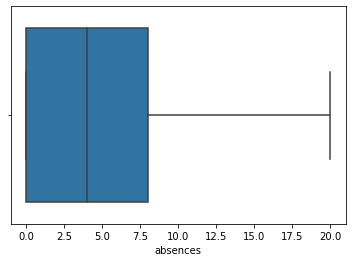

In [165]:
iqr('absences')

sns.boxplot(x=studying['absences'])

### Посмотрим на целевую переменную: 

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


<AxesSubplot:xlabel='score'>

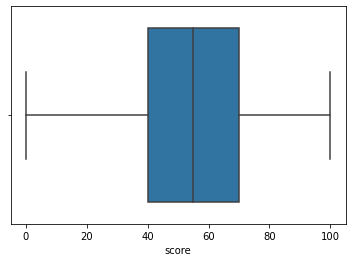

In [166]:
iqr('score')
sns.boxplot(x=studying['score'])

## Посмотрим таблицу корреляций числовых переменных: 

In [167]:
studying.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146405,-0.143849,0.070212,-0.018019,0.206279,0.018019,0.056941,0.013994,0.121057,-0.061752,0.192897,-0.155726
Medu,-0.146405,1.000000,0.589360,-0.149258,0.079513,-0.239668,-0.079513,-0.003566,0.037699,0.071235,-0.067791,0.098201,0.209758
Fedu,-0.143849,0.589360,1.000000,-0.109999,0.011723,-0.260794,-0.011723,-0.015492,-0.022669,0.046401,-0.015777,0.019381,0.124829
traveltime,0.070212,-0.149258,-0.109999,1.000000,-0.102979,0.086399,0.102979,0.002038,-0.041205,0.044696,0.004051,-0.028489,-0.106562
studytime,-0.018019,0.079513,0.011723,-0.102979,1.000000,-0.169399,-1.000000,0.037950,-0.122057,-0.053554,-0.063876,-0.082602,0.114295
failures,0.206279,-0.239668,-0.260794,0.086399,-0.169399,1.000000,0.169399,-0.028517,0.087558,0.101036,0.079030,0.100804,-0.337187
"studytime, granular",0.018019,-0.079513,-0.011723,0.102979,-1.000000,0.169399,1.000000,-0.037950,0.122057,0.053554,0.063876,0.082602,-0.114295
famrel,0.056941,-0.003566,-0.015492,0.002038,0.037950,-0.028517,-0.037950,1.000000,0.164830,0.069514,0.093256,-0.085939,0.052902
freetime,0.013994,0.037699,-0.022669,-0.041205,-0.122057,0.087558,0.122057,0.164830,1.000000,0.294450,0.067629,0.003876,0.017481
goout,0.121057,0.071235,0.046401,0.044696,-0.053554,0.101036,0.053554,0.069514,0.294450,1.000000,-0.015108,0.084490,-0.127742


## Корреляции признаков с оценками
### По матрице корреляций можно сказать, что наибольшая зависимость оценок от числовых показателей - это негативная зависимость между показателями failures и score - то есть, при возникновении количества неудач вне учебы, успеваемость учеников падает. Хотя этот показатель составляет всего лишь -0.33. После него наиболее сильная линейная зависимость наблюдается между фактором образования матери и оценкой ребенка - чем выше образование, тем успешнее ребенок в математике. Но снова-таки, эта зависимость составляет всего лишь 0.2. ДалееБ можно отметить что с возрастом успеваемость падает (корреляция -0.15). Также, при увеличении количества время провождения с друзьями, успеваемость также падает. Стоит отметить, что переменная studytime, granular - это всего лишь обратная переменная от studytime, по модулю у них одинаковая корреляция, поэтому этот показатель можно удалить. Стоит также отметить, что образование отца на успеваемость тоже влияет положительно, но очень незначительно (корреляция 0.12) 

## Корреляции между признаками
### Наиболее коррелируют (0.58) показатели образования отца и матери, что свидетельствует о том, что они находятся на одинаковом уровне (как минимум образования). Корреляция между признаками goout и freetime тоже понятна, при этом показатель freetime вообще не влияет на оценку. Также, стоит отметить, что между неудачами ребенка и образованием родителей существует обратная связь: то есть, чем выше уровень образования родителей, тем меньше уровень неудач, который случается с ребенком. Но при этом существует положительная зависимость между возрастом ученика и уровнем неудач.

### Удалим столбец studytime, granular: 

In [168]:
studying.drop(['studytime, granular'], inplace = True, axis = 1)

### Несмотря на то, что остальные столбцы не очень значимы, удалять мы их не будем, поскольку вполне возможно, что между данными присутствует зависимость, но не линейная

## Сделаем dummy-переменные: 

In [246]:
studying_dummies= pd.get_dummies(studying, columns = ['sex'])
studying_dummies

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,sex_F,sex_M
0,GP,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0,1,0
1,GP,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1,0
2,GP,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0,1,0
3,GP,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,1,0
4,GP,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,20.0,45.0,0,1
391,MS,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,0,1
392,MS,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0,0,1
393,MS,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,0,1


In [247]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['school'])

In [248]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['address'])

In [249]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['famsize'])

In [250]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['Pstatus'])

In [251]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['schoolsup'])

In [252]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['famsup'])

In [253]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['paid'])

In [254]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['activities'])

In [255]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['nursery'])

In [256]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['higher'])

In [257]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['internet'])

In [258]:
studying_dummies = pd.get_dummies(studying_dummies, columns = ['romantic'])

In [259]:
studying_dummies

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,sex_F,sex_M,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
1,17,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3.0,3.0,other,other,home,father,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,5.0,5.0,4.0,4.0,20.0,45.0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,17,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,21,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,18,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


In [260]:
studying_dummies.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,sex_F,sex_M,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.146405,-0.143849,0.070212,-0.018019,0.206279,0.056941,0.013994,0.121057,-0.061752,0.192897,-0.155726,0.030956,-0.030956,-0.379549,0.379549,0.149408,-0.149408,-0.031576,0.031576,-0.008750,0.008750,0.257442,-0.257442,0.145575,-0.145575,0.037896,-0.037896,0.078574,-0.078574,0.087478,-0.087478,0.209497,-0.209497,0.116484,-0.116484,-0.162512,0.162512
Medu,-0.146405,1.000000,0.589360,-0.149258,0.079513,-0.239668,-0.003566,0.037699,0.071235,-0.067791,0.098201,0.209758,-0.084161,0.084161,0.129834,-0.129834,-0.160191,0.160191,0.059450,-0.059450,0.124887,-0.124887,0.026066,-0.026066,-0.192269,0.192269,-0.171995,0.171995,-0.101160,0.101160,-0.172934,0.172934,-0.170924,0.170924,-0.198374,0.198374,-0.012478,0.012478
Fedu,-0.143849,0.589360,1.000000,-0.109999,0.011723,-0.260794,-0.015492,-0.022669,0.046401,-0.015777,0.019381,0.124829,-0.025312,0.025312,0.078285,-0.078285,-0.072087,0.072087,0.071064,-0.071064,0.084832,-0.084832,-0.048880,0.048880,-0.173079,0.173079,-0.100588,0.100588,-0.090888,0.090888,-0.141200,0.141200,-0.173544,0.173544,-0.134228,0.134228,-0.010295,0.010295
traveltime,0.070212,-0.149258,-0.109999,1.000000,-0.102979,0.086399,0.002038,-0.041205,0.044696,0.004051,-0.028489,-0.106562,-0.056806,0.056806,-0.238118,0.238118,0.373484,-0.373484,-0.038349,0.038349,-0.064187,0.064187,-0.005925,0.005925,0.008755,-0.008755,0.033011,-0.033011,0.026213,-0.026213,0.023594,-0.023594,0.099433,-0.099433,0.095915,-0.095915,-0.049097,0.049097
studytime,-0.018019,0.079513,0.011723,-0.102979,1.000000,-0.169399,0.037950,-0.122057,-0.053554,-0.063876,-0.082602,0.114295,0.304851,-0.304851,0.092208,-0.092208,0.044997,-0.044997,0.074499,-0.074499,-0.003128,0.003128,-0.039144,0.039144,-0.108577,0.108577,-0.141592,0.141592,-0.117063,0.117063,-0.090573,0.090573,-0.166190,0.166190,-0.043815,0.043815,-0.049933,0.049933
failures,0.206279,-0.239668,-0.260794,0.086399,-0.169399,1.000000,-0.028517,0.087558,0.101036,0.079030,0.100804,-0.337187,-0.021199,0.021199,-0.046515,0.046515,0.091669,-0.091669,-0.016117,0.016117,-0.001314,0.001314,-0.020515,0.020515,0.063403,-0.063403,0.153392,-0.153392,0.081135,-0.081135,0.092902,-0.092902,0.270493,-0.270493,0.072924,-0.072924,-0.109206,0.109206
famrel,0.056941,-0.003566,-0.015492,0.002038,0.037950,-0.028517,1.000000,0.164830,0.069514,0.093256,-0.085939,0.052902,-0.046715,0.046715,0.039872,-0.039872,0.013683,-0.013683,0.017595,-0.017595,-0.008838,0.008838,0.009768,-0.009768,-0.006285,0.006285,0.003808,-0.003808,-0.060852,0.060852,0.026204,-0.026204,-0.011952,0.011952,-0.056919,0.056919,0.067801,-0.067801
freetime,0.013994,0.037699,-0.022669,-0.041205,-0.122057,0.087558,0.164830,1.000000,0.294450,0.067629,0.003876,0.017481,-0.228632,0.228632,-0.034138,0.034138,-0.058433,0.058433,-0.021239,0.021239,-0.044000,0.044000,0.052964,-0.052964,-0.024763,0.024763,0.073130,-0.073130,-0.084097,0.084097,0.027454,-0.027454,0.046783,-0.046783,-0.090379,0.090379,0.033115,-0.033115
goout,0.121057,0.071235,0.046401,0.044696,-0.053554,0.101036,0.069514,0.294450,1.000000,-0.015108,0.084490,-0.127742,-0.092635,0.092635,0.008473,-0.008473,-0.066354,0.066354,-0.042201,0.042201,-0.034785,0.034785,0.038818,-0.038818,0.041586,-0.041586,-0.005732,0.005732,-0.056934,0.056934,0.010945,-0.010945,0.024203,-0.024203,-0.100789,0.100789,-0.008093,0.008093
health,-0.061752,-0.067791,-0.015777,0.004051,-0.063876,0.079030,0.093256,0.067629,-0.015108,1.000000,-0.049303,-0.080583,-0.148973,0.148973,0.042288,-0.042288,0.041864,-0.041864,0.035790,-0.035790,-0.006963,0.006963,0.048194,-0.048194,-0.012043,0.012043,0.056983,-0.056983,-0.049392,0.049392,0.008602,-0.008602,0.007349,-

## Оставим только по одной dummy-переменной, и уберем из анализа Fedu, поскольку она коррелирует с Medu на 0.58, что выше чем любая корреляция факторов с целевой переменной

In [263]:
studying_dummies.drop(['school_GP'], inplace = True, axis = 1)
studying_dummies.drop(['address_R'], inplace = True, axis = 1)
studying_dummies.drop(['famsize_GT3'], inplace = True, axis = 1)
studying_dummies.drop(['Pstatus_A'], inplace = True, axis = 1)
studying_dummies.drop(['schoolsup_no'], inplace = True, axis = 1)
studying_dummies.drop(['famsup_no'], inplace = True, axis = 1)
studying_dummies.drop(['paid_no'], inplace = True, axis = 1)
studying_dummies.drop(['activities_no'], inplace = True, axis = 1)
studying_dummies.drop(['nursery_no'], inplace = True, axis = 1)
studying_dummies.drop(['higher_no'], inplace = True, axis = 1)
studying_dummies.drop(['internet_no'], inplace = True, axis = 1)
studying_dummies.drop(['romantic_no'], inplace = True, axis = 1)

In [266]:
studying_dummies.drop(['sex_F'], inplace = True, axis = 1)

In [267]:
studying_dummies.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,sex_M,school_MS,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
age,1.000000,-0.146405,-0.143849,0.070212,-0.018019,0.206279,0.056941,0.013994,0.121057,-0.061752,0.192897,-0.155726,-0.030956,0.379549,-0.149408,0.031576,0.008750,-0.257442,-0.145575,-0.037896,-0.078574,-0.087478,-0.209497,-0.116484,0.162512
Medu,-0.146405,1.000000,0.589360,-0.149258,0.079513,-0.239668,-0.003566,0.037699,0.071235,-0.067791,0.098201,0.209758,0.084161,-0.129834,0.160191,-0.059450,-0.124887,-0.026066,0.192269,0.171995,0.101160,0.172934,0.170924,0.198374,0.012478
Fedu,-0.143849,0.589360,1.000000,-0.109999,0.011723,-0.260794,-0.015492,-0.022669,0.046401,-0.015777,0.019381,0.124829,0.025312,-0.078285,0.072087,-0.071064,-0.084832,0.048880,0.173079,0.100588,0.090888,0.141200,0.173544,0.134228,0.010295
traveltime,0.070212,-0.149258,-0.109999,1.000000,-0.102979,0.086399,0.002038,-0.041205,0.044696,0.004051,-0.028489,-0.106562,0.056806,0.238118,-0.373484,0.038349,0.064187,0.005925,-0.008755,-0.033011,-0.026213,-0.023594,-0.099433,-0.095915,0.049097
studytime,-0.018019,0.079513,0.011723,-0.102979,1.000000,-0.169399,0.037950,-0.122057,-0.053554,-0.063876,-0.082602,0.114295,-0.304851,-0.092208,-0.044997,-0.074499,0.003128,0.039144,0.108577,0.141592,0.117063,0.090573,0.166190,0.043815,0.049933
failures,0.206279,-0.239668,-0.260794,0.086399,-0.169399,1.000000,-0.028517,0.087558,0.101036,0.079030,0.100804,-0.337187,0.021199,0.046515,-0.091669,0.016117,0.001314,0.020515,-0.063403,-0.153392,-0.081135,-0.092902,-0.270493,-0.072924,0.109206
famrel,0.056941,-0.003566,-0.015492,0.002038,0.037950,-0.028517,1.000000,0.164830,0.069514,0.093256,-0.085939,0.052902,0.046715,-0.039872,-0.013683,-0.017595,0.008838,-0.009768,0.006285,-0.003808,0.060852,-0.026204,0.011952,0.056919,-0.067801
freetime,0.013994,0.037699,-0.022669,-0.041205,-0.122057,0.087558,0.164830,1.000000,0.294450,0.067629,0.003876,0.017481,0.228632,0.034138,0.058433,0.021239,0.044000,-0.052964,0.024763,-0.073130,0.084097,-0.027454,-0.046783,0.090379,-0.033115
goout,0.121057,0.071235,0.046401,0.044696,-0.053554,0.101036,0.069514,0.294450,1.000000,-0.015108,0.084490,-0.127742,0.092635,-0.008473,0.066354,0.042201,0.034785,-0.038818,-0.041586,0.005732,0.056934,-0.010945,-0.024203,0.100789,0.008093
health,-0.061752,-0.067791,-0.015777,0.004051,-0.063876,0.079030,0.093256,0.067629,-0.015108,1.000000,-0.049303,-0.080583,0.148973,-0.042288,-0.041864,-0.035790,0.006963,-0.048194,0.012043,-0.056983,0.049392,-0.008602,-0.007349,-0.093497,0.015411


## По корреляциям dummy-переменных можно сказать, что на успеваемость положительно влияет желание ученика поступить в университет, а также отсутствие романтических отношений. Остальные переменные также имеют влияние, но оно незначительно.

# Выводы: 
#### В работе был проведен первичный анализ данных. 
1. Было произведено заполнение отсутствующих значений при помощи значений моды, медианы, а также с учетом значений других столбцов (основано на здравом смысле) 
2. Выбросы найдены в столбцах возраста (были проигнорированы), образования отца, а также в переменной пропусков занятий. Найденные выбросы были исправлены.
3. В работе были выделены признаки значимых номинативных переменных при помощи коробок с усами. 
4. Некоторые данные были преобразованы в dummy, рассмотрена матрица корреляций с их учетом, по каждой дамми-переменной была оставлена только одна составляющая (пол - только женский, к примеру) из-за 100% корреляций. 
5. Также были рассмотрены номинативные переменные, но для использования в модели их нужно будет в дальнейшем преобразовать.


